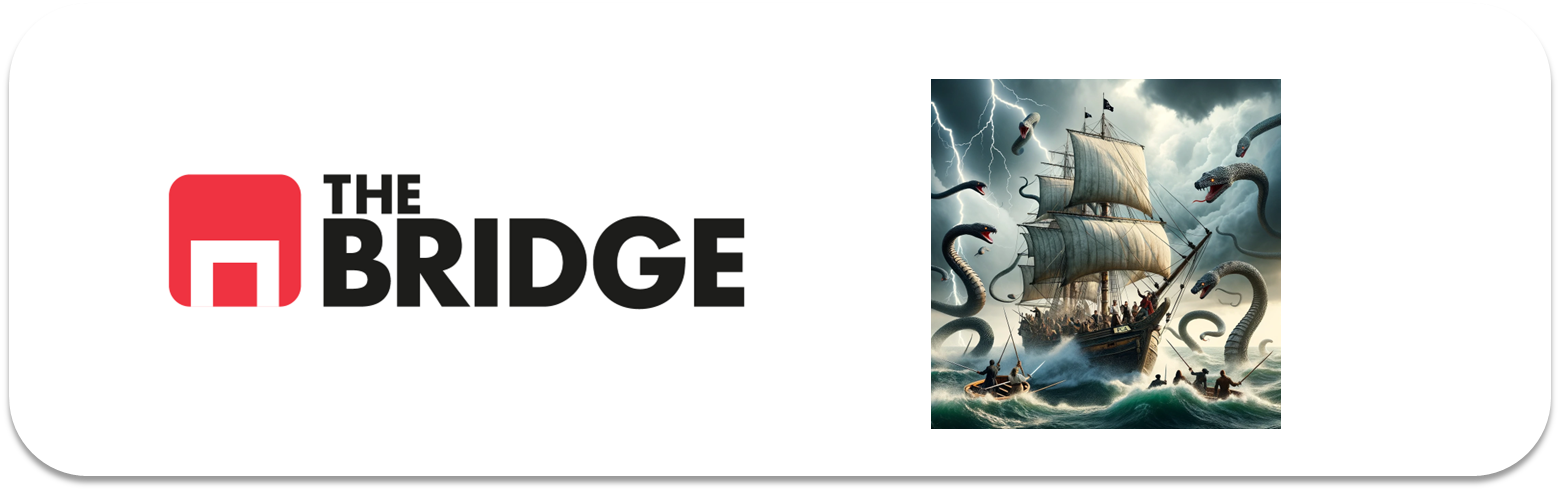

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [305]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.stats import mannwhitneyu, chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import bootcampviztools as bt
import toolbox_ML as tl

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


---

## 0. Carga de datos y primera visualización

In [306]:
df = pd.read_csv("./data/credit_npo.csv")

df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [307]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

## 1. Limpieza previa al split de train / test

In [309]:
# nos deshacemos de las filas con nulos como dice el enunciado

df_backup = df.copy()

df = df.dropna()

In [310]:
df.info() # ya no tenemos nulos

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [311]:
# analizamos las columnas 'NumberOf...' para ver si las podemos reducir a menos categorias según nos piden el enunciado

df.NumberOfDependents.value_counts() # nos quedamos con la categoría de 0 personas a su cargo / 1-2 personas / 3+ personas a su cargo

NumberOfDependents
0.0     6413
1.0     2369
2.0     1813
3.0      881
4.0      251
5.0       61
6.0       24
8.0        2
10.0       1
7.0        1
Name: count, dtype: int64

In [312]:
df["n_dependants_cat"] = pd.cut(df["NumberOfDependents"],
                               bins=[-np.inf, 0.1, 2.1, np.inf], # definimos los intervalos donde pondremos el límite de los valores que caen en cada categoria
                               labels=[0, 1, 2]).astype(int) # y lo convertimos a int puesto que con la función 'cut' de pandas nos lo devuelve como 'category' 


C:\Users\tania\AppData\Local\Temp\ipykernel_23288\1869067856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["n_dependants_cat"] = pd.cut(df["NumberOfDependents"],


In [313]:
df.loc[:,["NumberOfDependents","n_dependants_cat"]] 

,NumberOfDependents,n_dependants_cat
0,0.0,0
1,0.0,0
2,2.0,1
3,3.0,2
4,1.0,1
...,...,...
12532,0.0,0
12533,0.0,0
12534,2.0,1
12535,1.0,1


In [314]:
df.NumberOfTimes90DaysLate.value_counts() # 0 veces / de 1 a 3 / + 4 veces

NumberOfTimes90DaysLate
0     11156
1       394
2       142
3        54
4        31
5        14
98       10
6         6
8         3
7         3
10        1
9         1
13        1
Name: count, dtype: int64

In [315]:
df["times_90_days_late_cat"] = pd.cut(df["NumberOfTimes90DaysLate"],
                               bins=[-np.inf, 0.1, 3.1, np.inf], # definimos los intervalos donde pondremos el límite de los valores que caen en cada categoria
                               labels=[0, 1, 2]).astype(int) 

C:\Users\tania\AppData\Local\Temp\ipykernel_23288\2261673428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["times_90_days_late_cat"] = pd.cut(df["NumberOfTimes90DaysLate"],


In [316]:
df.loc[:,["NumberOfTimes90DaysLate","times_90_days_late_cat"]].sample(10)

,NumberOfTimes90DaysLate,times_90_days_late_cat
4388,0,0
3145,0,0
12224,0,0
5971,0,0
6328,0,0
11528,2,1
1219,0,0
3171,0,0
9273,0,0
5121,0,0


In [317]:
df["times_60_89_days_late_cat"] = pd.cut(df["NumberOfTime60-89DaysPastDueNotWorse"],
                               bins=[-np.inf, 0.1, 3.1, np.inf], # definimos los intervalos donde pondremos el límite de los valores que caen en cada categoria
                               labels=[0, 1, 2]).astype(int) 

C:\Users\tania\AppData\Local\Temp\ipykernel_23288\1975049020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["times_60_89_days_late_cat"] = pd.cut(df["NumberOfTime60-89DaysPastDueNotWorse"],


In [318]:
df["times_30_59_days_late_cat"] = pd.cut(df["NumberOfTime30-59DaysPastDueNotWorse"],
                               bins=[-np.inf, 0.1, 3.1, np.inf], # definimos los intervalos donde pondremos el límite de los valores que caen en cada categoria
                               labels=[0, 1, 2]).astype(int) 

C:\Users\tania\AppData\Local\Temp\ipykernel_23288\939156146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["times_30_59_days_late_cat"] = pd.cut(df["NumberOfTime30-59DaysPastDueNotWorse"],


In [319]:
df.NumberRealEstateLoansOrLines.value_counts() # la dejamos como num discreta

NumberRealEstateLoansOrLines
0     4233
1     4149
2     2585
3      530
4      179
5       74
6       27
7       13
8        9
9        4
11       4
12       3
16       2
10       2
19       1
13       1
Name: count, dtype: int64

## 3. Train / test split

In [320]:
target = df["SeriousDlqin2yrs"]

X = df.copy() 
X.drop("SeriousDlqin2yrs", axis=1, inplace=True)  # quitamos el target del conjunto de datos

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

## 4. Mini-Eda

In [321]:
# distribución del target

X_train["target"] = y_train

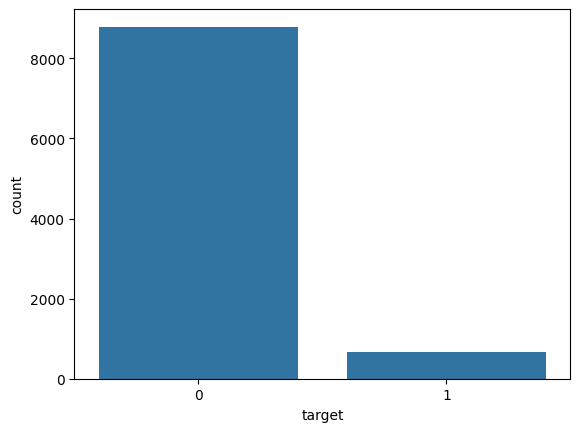

In [322]:
sns.countplot(data= X_train,x='target'); # target muy desbalanceado

In [323]:
lista_cat = df.columns.to_list()

In [324]:
df_tipificado = tl.tipifica_variables(X_train,5, 17)
df_tipificado

,nombre_variable,tipo_sugerido
0,RevolvingUtilizationOfUnsecuredLines,Numérica continua
1,age,Numérica discreta
2,NumberOfTime30-59DaysPastDueNotWorse,Numérica discreta
3,DebtRatio,Numérica continua
4,MonthlyIncome,Numérica continua
5,NumberOfOpenCreditLinesAndLoans,Numérica discreta
6,NumberOfTimes90DaysLate,Numérica discreta
7,NumberRealEstateLoansOrLines,Numérica discreta
8,NumberOfTime60-89DaysPastDueNotWorse,Numérica discreta
9,NumberOfDependents,Numérica discreta


In [325]:
df_tipificado.set_index("nombre_variable", inplace= True)

In [ ]:
all_features = df_tipificado.index.to_list()
all_features.remove('target') # me hago una lista con todas las variables, menos el target

In [326]:
es_catego = df_tipificado.tipo_sugerido == "Categórica" 
es_binaria = df_tipificado.tipo_sugerido == "Binaria"

es_num_dis = df_tipificado.tipo_sugerido == "Numérica discreta"
es_num_con = df_tipificado.tipo_sugerido == "Numérica continua"

In [327]:
# y las pasamos a su lista correspondiente

lista_cat = df_tipificado[es_catego | es_binaria].index.to_list()
lista_num = df_tipificado[es_num_dis | es_num_con].index.to_list()

In [328]:
print(f"Lista categóricas: {lista_cat}")
print(f"Lista numéricas: {lista_num}")

Lista categóricas: ['n_dependants_cat', 'times_90_days_late_cat', 'times_60_89_days_late_cat', 'times_30_59_days_late_cat', 'target']
Lista numéricas: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [329]:
# quitamos de la lista de numéricas aquellas que hemos convertido previamente en 3 categorías:

lista_num.remove("NumberOfTimes90DaysLate")
lista_num.remove("NumberOfDependents")
lista_num.remove("NumberOfTime30-59DaysPastDueNotWorse")
lista_num.remove("NumberOfTime60-89DaysPastDueNotWorse")


In [330]:
# quitamos el target de la lista de categóricas

lista_cat.remove("target")

In [331]:
lista_cat

['n_dependants_cat',
 'times_90_days_late_cat',
 'times_60_89_days_late_cat',
 'times_30_59_days_late_cat']

In [332]:
lista_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines']

## 5. Visualización contra target y tests de confianza estadística

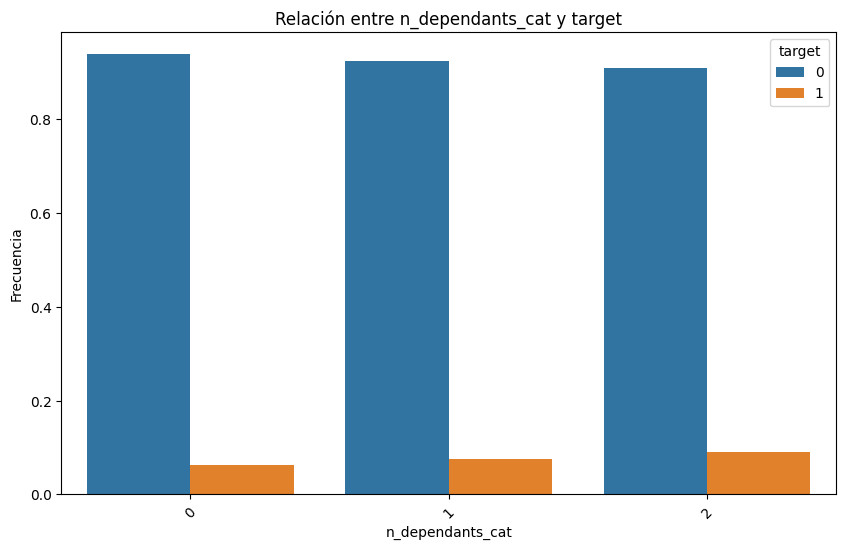

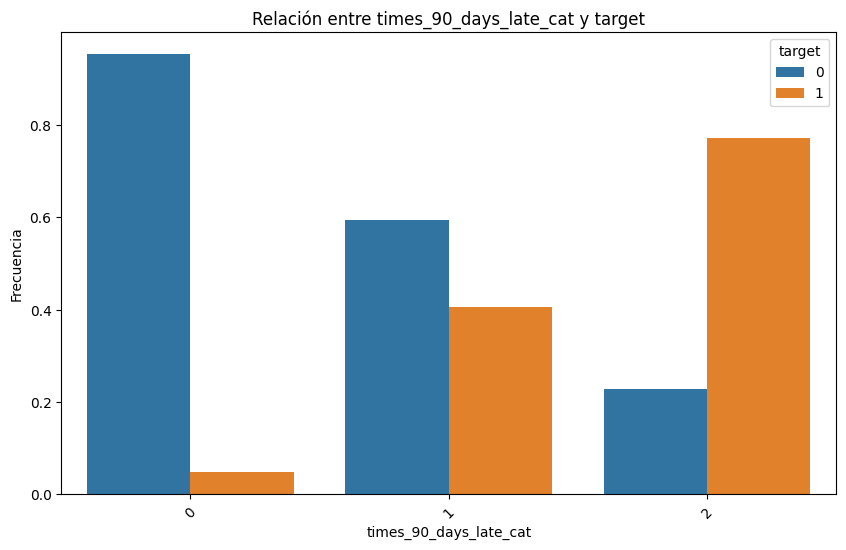

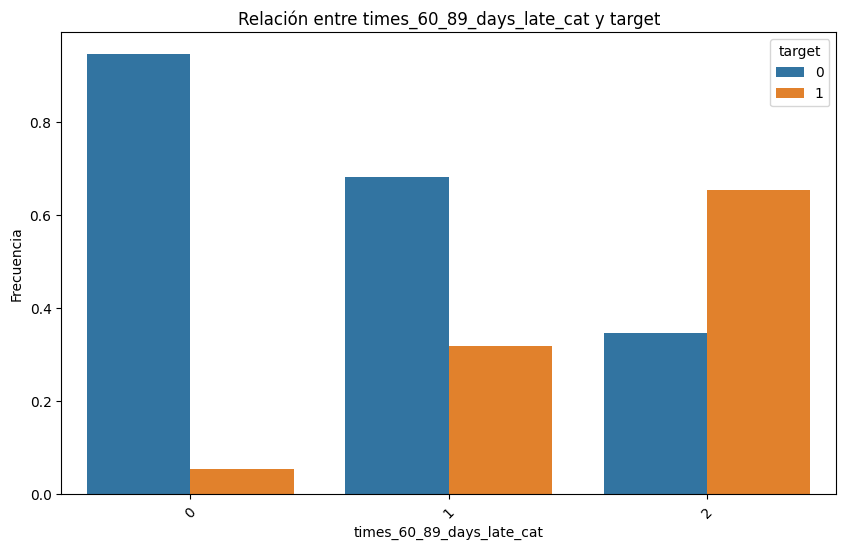

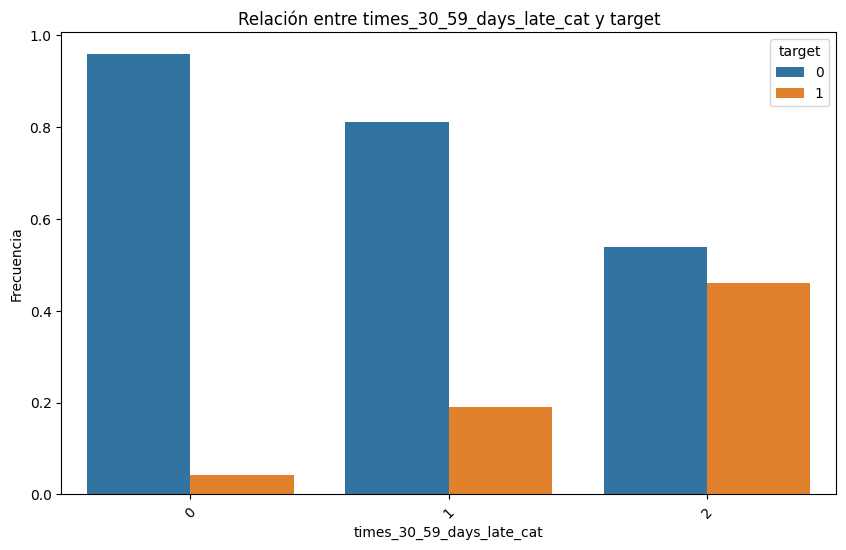

In [333]:
# BIVARIANTE TARGET vs CATGERÓRICAS

for catego in lista_cat:
    
    bt.plot_categorical_relationship_fin(X_train, catego, 'target', relative_freq = True)

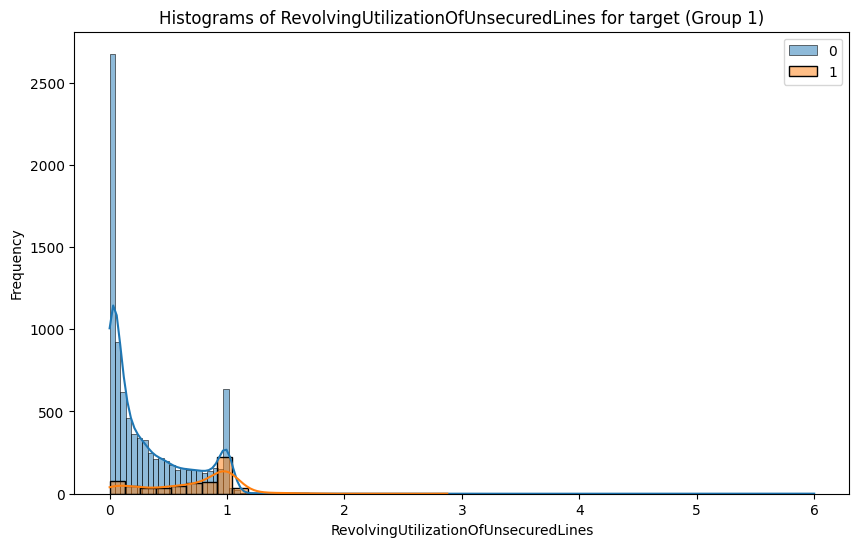

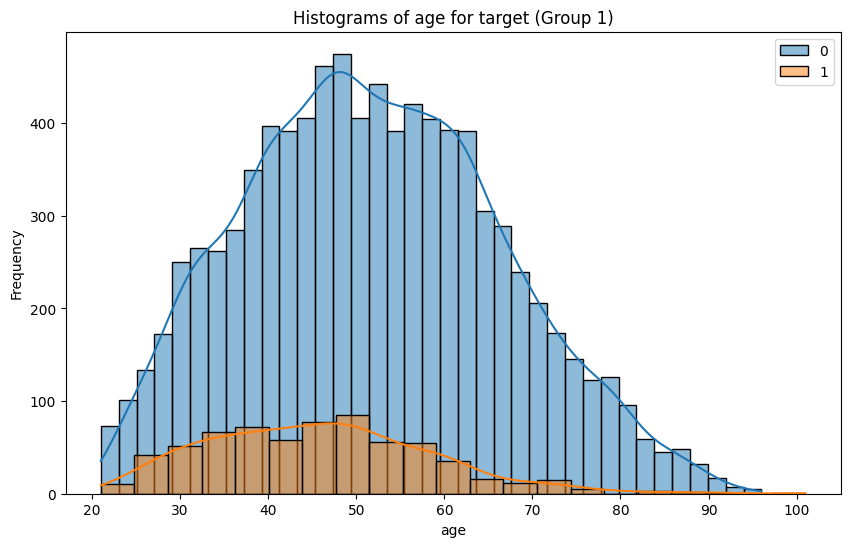

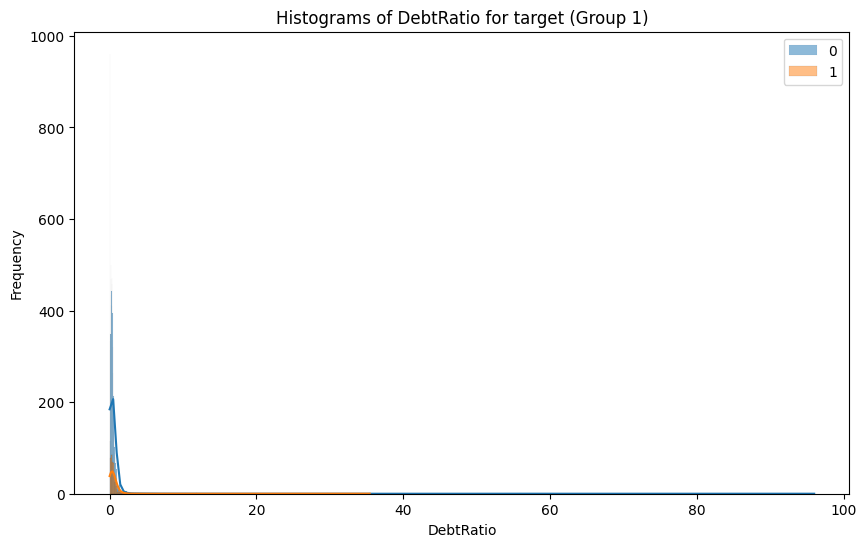

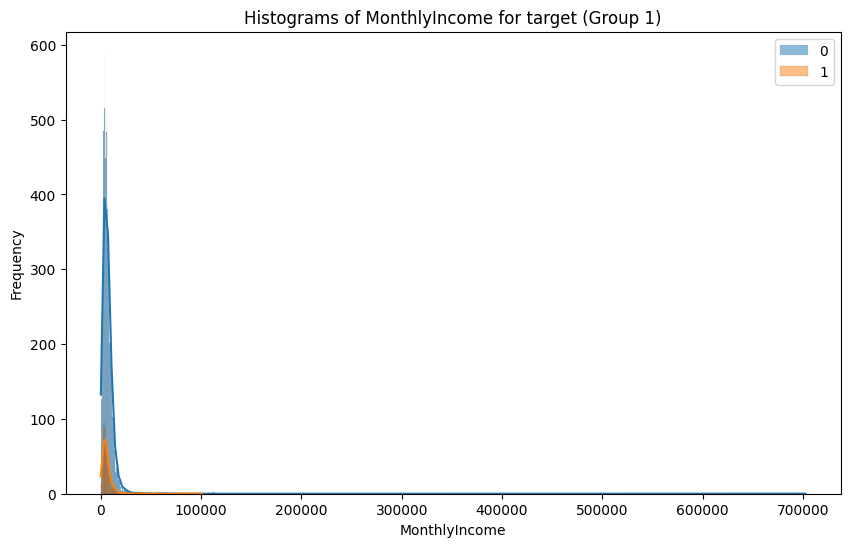

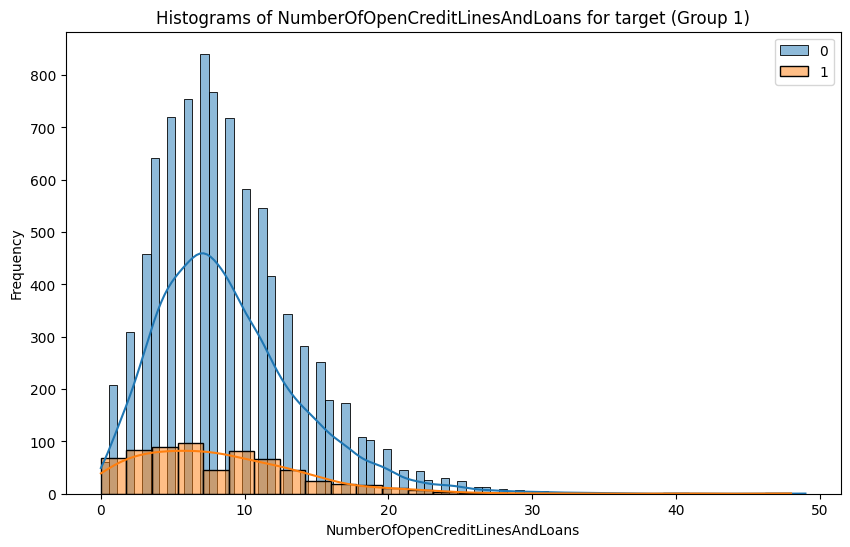

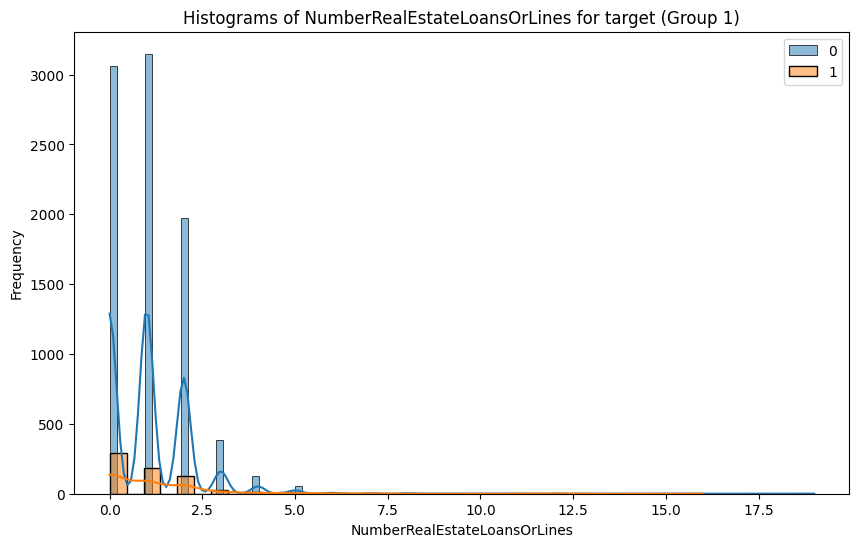

In [334]:
# VISUALIZACIÓN BIVARIANTE TARGET vs NUMERICAS    

# histogramas y kde

for num in lista_num:
    bt.plot_grouped_histograms(X_train, 'target',num, group_size=2)

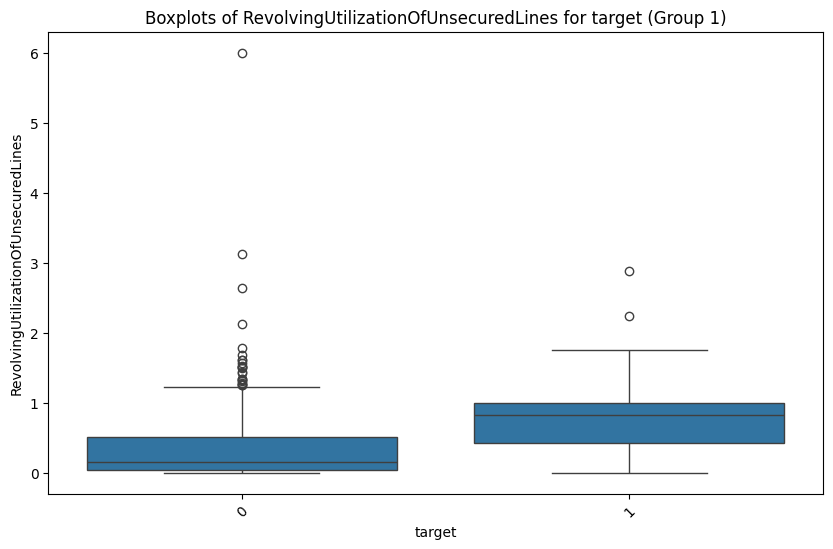

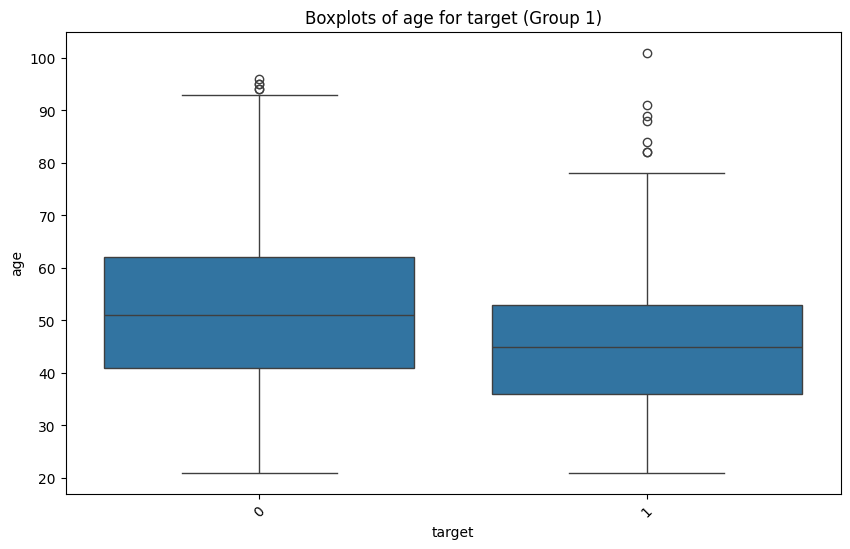

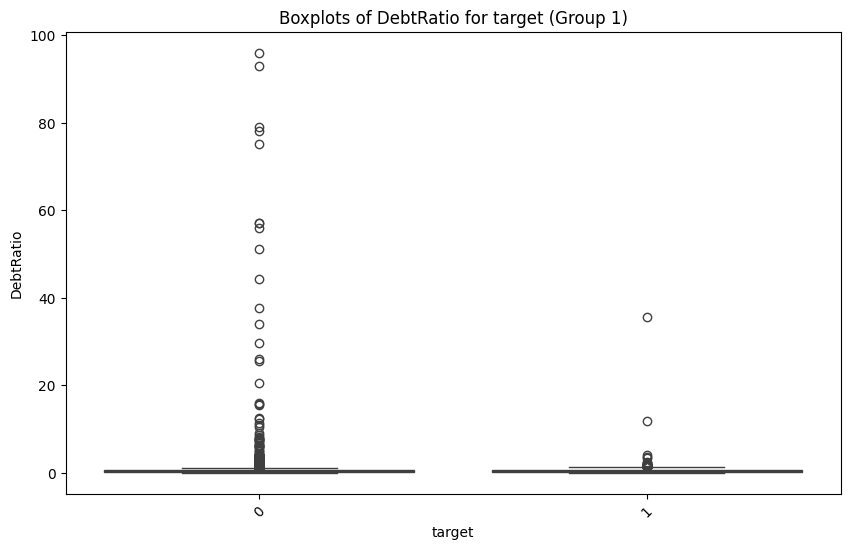

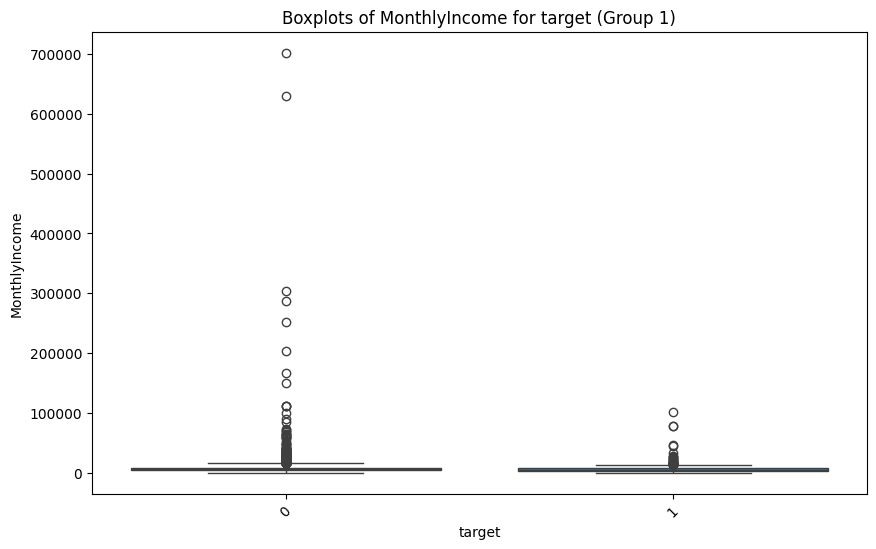

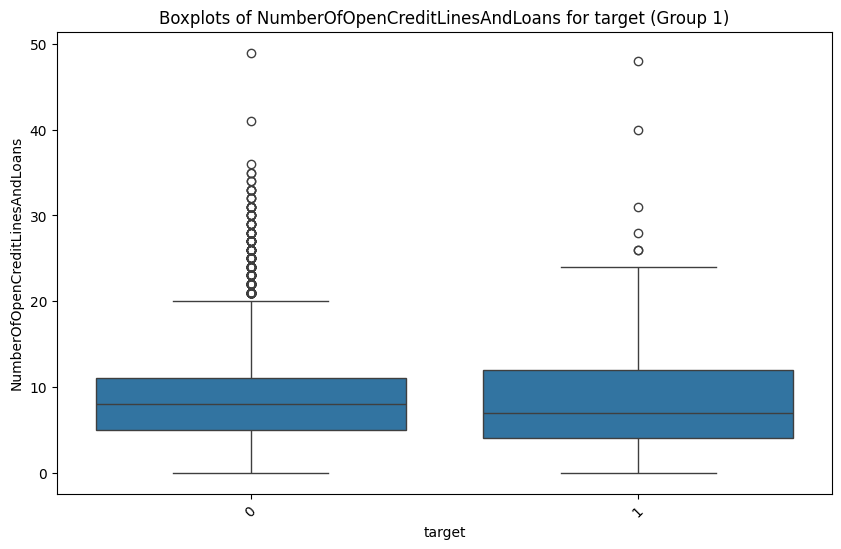

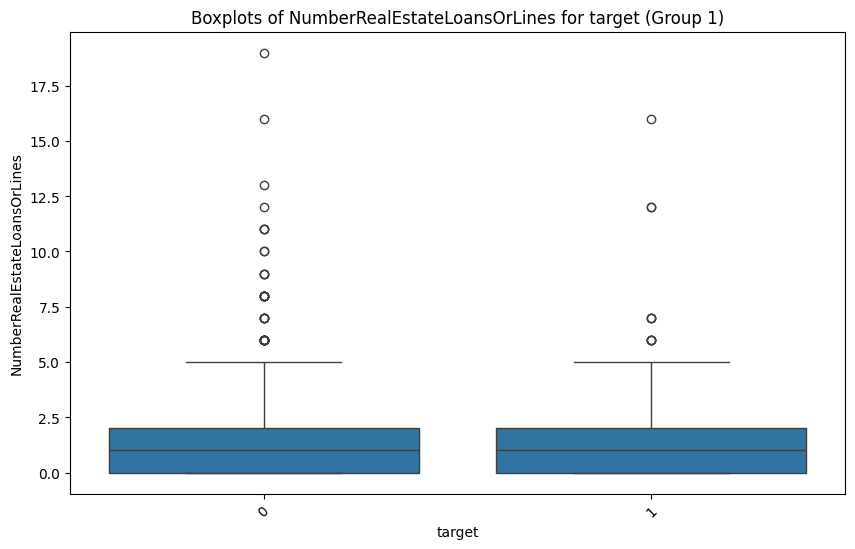

In [335]:
# diagrama de cajas

for num in lista_num:
    bt.plot_grouped_boxplots(X_train,'target', num)

## Test chi2

In [414]:
from scipy import stats

# BIVARIANTE TARGET (binaria) vs CATEGÓRICAS --> TEST CHI2 para comparar categóricas.


# iteramos la lista de categóricas que instanciamos anteriormente y aplicamos el test de confianza Chi2 contra el target. 
features_cat_chi2 = {}
for catego in lista_cat:
    
    tabla_contingencia = pd.crosstab(X_train.target, X_train[catego])

    chi2, pvalue, dof, expected = chi2_contingency(tabla_contingencia)

    # Nos quedamos con aquellas cuyo pvalue sea igual o menor que 0.05 y las añadimos a la nueva lista de features categóricas_chi2
    
    if pvalue <= 0.05:
        features_cat_chi2[catego] = pvalue   
        print(f"P-value de {catego} contra target:", pvalue)

print("\n")
print("Selección de features categóricas en base al test Chi-2:")

features_cat_chi2 # obtenemos la lista de aquellas que superan el test de confianza estadística con un 95%, la que más discrimina es nº times 90 days late

P-value de n_dependants_cat contra target: 0.00115655338460531
P-value de times_90_days_late_cat contra target: 3.022710157203869e-287
P-value de times_60_89_days_late_cat contra target: 1.6598874619762428e-134
P-value de times_30_59_days_late_cat contra target: 1.8271032142066738e-143


Selección de features categóricas en base al test Chi-2:


{'n_dependants_cat': np.float64(0.00115655338460531),
 'times_90_days_late_cat': np.float64(3.022710157203869e-287),
 'times_60_89_days_late_cat': np.float64(1.6598874619762428e-134),
 'times_30_59_days_late_cat': np.float64(1.8271032142066738e-143)}

## U de Mann-Whitney

In [413]:
# BIVARIANTE TARGET (binaria) vs NUMÉRICAS --> TEST DE CONFIANZA U de Mann-Whitney
 
features_num_Umannwhitney = {}
for variable in lista_num:    
        
    grupo_a = X_train.loc[X_train.target == 1][variable]  
    grupo_b = X_train.loc[X_train.target == 0][variable]

# empleamos el test U de mann whitney puesto que queremos testear una binaria (target) contra variables numéricas 
    u_stat, p_value = mannwhitneyu(grupo_a, grupo_b)

    if p_value <= 0.05: # todas aquellas cuyo pvalue sea igual o inferior a 0.05, entran en la selección de features

        features_num_Umannwhitney[variable] = p_value
        print(f"P-value de {variable} contra target:", p_value)

print("\n")
print("Selección de features numéricas en base al test U de Mann-Whitney:")

features_num_Umannwhitney # la que más discrimina es el uso de tarjetas revolving

P-value de RevolvingUtilizationOfUnsecuredLines contra target: 6.964140175938447e-127
P-value de age contra target: 1.2329564748313774e-26
P-value de DebtRatio contra target: 1.920288228898668e-05
P-value de MonthlyIncome contra target: 4.937655211085432e-09
P-value de NumberOfOpenCreditLinesAndLoans contra target: 5.276240582379398e-05
P-value de NumberRealEstateLoansOrLines contra target: 0.002619617920579262


Selección de features numéricas en base al test U de Mann-Whitney:


{'RevolvingUtilizationOfUnsecuredLines': np.float64(6.964140175938447e-127),
 'age': np.float64(1.2329564748313774e-26),
 'DebtRatio': np.float64(1.920288228898668e-05),
 'MonthlyIncome': np.float64(4.937655211085432e-09),
 'NumberOfOpenCreditLinesAndLoans': np.float64(5.276240582379398e-05),
 'NumberRealEstateLoansOrLines': np.float64(0.002619617920579262)}

In [415]:
features_tests_confianza = features_cat_chi2 | features_num_Umannwhitney
pd.Series(features_tests_confianza).sort_values()

times_90_days_late_cat                  3.022710e-287
times_30_59_days_late_cat               1.827103e-143
times_60_89_days_late_cat               1.659887e-134
RevolvingUtilizationOfUnsecuredLines    6.964140e-127
age                                      1.232956e-26
MonthlyIncome                            4.937655e-09
DebtRatio                                1.920288e-05
NumberOfOpenCreditLinesAndLoans          5.276241e-05
n_dependants_cat                         1.156553e-03
NumberRealEstateLoansOrLines             2.619618e-03
dtype: float64

In [418]:
# guardamos las 6 que más discriminan en una lista

seleccion_tests_confianza = pd.Series(features_tests_confianza).sort_values().index.tolist()[0:6]
seleccion_tests_confianza

['times_90_days_late_cat',
 'times_30_59_days_late_cat',
 'times_60_89_days_late_cat',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome']

## 6. Selección de features categóricas mediante Mutual Information , SelectKbest y ANOVA

In [ ]:
# mutual info para las categóricas

from sklearn.metrics import mutual_info_score

mutualinfo_pvalue = {}

for col in lista_cat:
    mutualinfo_pvalue[col] = mutual_info_score(X_train[col],X_train["target"])  # pasamos los valores a un diccionario
    print(f"MI({col};{"target"}):", mutual_info_score(X_train[col],X_train["target"]))

MI(n_dependants_cat;target): 0.0006967683040356928
MI(times_90_days_late_cat;target): 0.03571613242084286
MI(times_60_89_days_late_cat;target): 0.018380215097790017
MI(times_30_59_days_late_cat;target): 0.024009655496143135


In [365]:
pd.Series(mutualinfo_pvalue).sort_values() # y los convertimos en una serie ordenada de menor a mayor

n_dependants_cat             0.000697
times_60_89_days_late_cat    0.018380
times_30_59_days_late_cat    0.024010
times_90_days_late_cat       0.035716
dtype: float64

In [366]:
# ANOVA para las numéricas

from scipy import stats

cat_col = "target"
target_cat = X_train[cat_col].unique() 
target_por_num = [X_train[X_train[cat_col] == categoria][lista_num] for categoria in target_cat] 

f_val, p_val = stats.f_oneway(*target_por_num)
                                                    
#print("Valor F:", f_val)
print("Valor p:", p_val)

Valor p: [6.12914400e-175 7.78315943e-026 8.56297874e-001 7.74459141e-002
 1.59165160e-003 8.70509418e-001]


In [ ]:
anova_pvalue = {}  # pasamos también los valores anteriores a una colección

for index, col in enumerate(lista_num):
    anova_pvalue[col] = p_val[index] 

In [364]:
pd.Series(anova_pvalue).sort_values()

RevolvingUtilizationOfUnsecuredLines    6.129144e-175
age                                      7.783159e-26
NumberOfOpenCreditLinesAndLoans          1.591652e-03
MonthlyIncome                            7.744591e-02
DebtRatio                                8.562979e-01
NumberRealEstateLoansOrLines             8.705094e-01
dtype: float64

In [ ]:
# Selectkbest selecciona las 5 columnas con mejores resultados en el test ANOVA anterior

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(X_train[lista_num], y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans
0,0.391240,68.0,2.693124,2166.0,13.0
1,0.906540,59.0,0.325227,6496.0,7.0
2,0.933223,52.0,0.372442,8258.0,3.0
3,0.857859,50.0,0.511098,5225.0,9.0
4,0.000000,61.0,0.414167,5166.0,5.0
...,...,...,...,...,...
9447,0.397822,53.0,0.332584,11560.0,14.0
9448,0.015171,76.0,0.005427,3500.0,4.0
9449,0.988201,62.0,0.450432,8442.0,4.0
9450,0.122072,41.0,0.638133,3749.0,9.0


In [381]:
# juntamos los diccionarios 

anova_mutualinfo_dict = anova_pvalue | mutualinfo_pvalue

anova_mutualinfo_pvalues= pd.Series(anova_mutualinfo_dict).sort_values(ascending=True)

anova_mutualinfo_pvalues # ya las tenemos ordenadas de menor a mayor pvalue, la que mas discrimina es el uso de trajetas revolving, seguida de la edad y el num personas a su cargo
                         # la que menos es el num de hipotecas 


RevolvingUtilizationOfUnsecuredLines    6.129144e-175
age                                      7.783159e-26
n_dependants_cat                         6.967683e-04
NumberOfOpenCreditLinesAndLoans          1.591652e-03
times_60_89_days_late_cat                1.838022e-02
times_30_59_days_late_cat                2.400966e-02
times_90_days_late_cat                   3.571613e-02
MonthlyIncome                            7.744591e-02
DebtRatio                                8.562979e-01
NumberRealEstateLoansOrLines             8.705094e-01
dtype: float64

In [401]:
# nos quedamos con las 6 que más discriminan

seleccion_anova_mutualinfo = anova_mutualinfo_pvalues[0:6].index.to_list() # las pasamos a una lista
seleccion_anova_mutualinfo

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'n_dependants_cat',
 'NumberOfOpenCreditLinesAndLoans',
 'times_60_89_days_late_cat',
 'times_30_59_days_late_cat']

## 7. Selección features mediante SelectFromModel

In [396]:
from sklearn.ensemble import RandomForestClassifier # lo haremos con un randomforest


rf_selector = RandomForestClassifier(random_state= 42, class_weight= "balanced")
rf_selector.fit(X_train[all_features],y_train)
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.25128694, 0.11281613, 0.11768619, 0.11545921, 0.08154386])

In [397]:
from sklearn.feature_selection import SelectFromModel

selector_model = SelectFromModel(estimator = rf_selector, threshold= "median") # El modelo debe tener un atributo feature_importances_ o un atributo coef_
selector_model.fit(X_train[all_features],y_train) 

SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                 random_state=42),
                threshold='median')

In [ ]:
selector_model.get_feature_names_out() # ésta es la selección del randomforest

array(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'times_90_days_late_cat'], dtype=object)

In [403]:
# lo pasamos a una lista y nos quedamos con las 6 primeras

seleccion_rf = selector_model.get_feature_names_out().tolist()[0:6]
seleccion_rf

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans']

## 8. Selección de las mejores features empleando RFE (recursive feature elimination)

In [406]:
from sklearn.feature_selection import RFE

rf_RFE = RandomForestClassifier(random_state= 42, class_weight= "balanced") # Puedes usar tu modelo, o modelos a probar o un modelo "proxy" como en la selección por modelo

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 6, # Iterará hasta quedarse con 6
          step = 1) # Elimina de una en una

rfe.fit(X_train[all_features], y_train)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = all_features).sort_values("ranking")

[1 1 1 1 1 1 3 6 7 5 9 2 8 4]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
NumberOfTime30-59DaysPastDueNotWorse,1
DebtRatio,1
MonthlyIncome,1
NumberOfOpenCreditLinesAndLoans,1
times_90_days_late_cat,2
NumberOfTimes90DaysLate,3
times_30_59_days_late_cat,4
NumberOfDependents,5


In [ ]:
seleccion_rfe = pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = all_features).sort_values("ranking").index.to_list()[0:6]
seleccion_rfe # volvemos a quedarnos con las mejores 6 y las pasamos a una lista

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans']

## 9. Selección de las mejores features empleando SFS (sequential feature selection)

In [409]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_SFS = RandomForestClassifier(random_state = 42, class_weight= "balanced")

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 6,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train[all_features], y_train)


SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(class_weight='balanced',
                                                           random_state=42),
                          n_features_to_select=6, scoring='balanced_accuracy')

In [412]:
# estas son las 6 seleccionadas, pero no vienen por orden de ránking

seleccion_sfs = sfs_forward.get_feature_names_out().tolist() 
seleccion_sfs

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'times_90_days_late_cat',
 'times_60_89_days_late_cat',
 'times_30_59_days_late_cat']

## 10. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores

In [ ]:
from collections import Counter

# creamos una lista con todas las selecciones de features previas, tenemos un total de 5 listas

all_selections = seleccion_tests_confianza + seleccion_anova_mutualinfo + seleccion_rf + seleccion_rfe + seleccion_sfs

# contamos cuántas veces aparece cada feature 
conteo = Counter(all_selections)

resultado_voting = {} # volvemos a guardar los resultados en un diccionario
for candidato, total in conteo.items():
    resultado_voting[candidato] = total

# ya podemos escoger las features más veces aparecen en las 5 listas, nos quedamos las que han obtenido 4 y 3 votos
pd.Series(resultado_voting).sort_values(ascending=False)

RevolvingUtilizationOfUnsecuredLines    4
age                                     4
times_60_89_days_late_cat               3
times_30_59_days_late_cat               3
NumberOfOpenCreditLinesAndLoans         3
MonthlyIncome                           3
NumberOfTime30-59DaysPastDueNotWorse    3
times_90_days_late_cat                  2
DebtRatio                               2
n_dependants_cat                        1
NumberOfTimes90DaysLate                 1
NumberOfTime60-89DaysPastDueNotWorse    1
dtype: int64

In [436]:
seleccion_hard_voting = pd.Series(resultado_voting).sort_values(ascending=False)[:7].index.to_list()
seleccion_hard_voting


['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'times_60_89_days_late_cat',
 'times_30_59_days_late_cat',
 'NumberOfOpenCreditLinesAndLoans',
 'MonthlyIncome',
 'NumberOfTime30-59DaysPastDueNotWorse']

## 11. Entrenamiento del modelo

Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

In [437]:
# vamos a entrenar varios modelos como baseline y quedarnos con el que mejor métricas obtengamos

from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
 

# los instanciamos en una variable distinta para cada uno con sus hiperparámetros por defecto
model_names = ["XGBoost","LightGBM","RandomForest"]

xgb_clf = XGBClassifier(max_depth= 4, random_state = 42)
lgb_clf = LGBMClassifier(max_depth= 4, random_state= 42, verbose = -100, class_weight= "balanced")
rf_clf = RandomForestClassifier(max_depth= 4, random_state= 42, class_weight= "balanced")

# lista con todos los modelos
model_set = [xgb_clf, lgb_clf, rf_clf]  

In [453]:
# ENTRENAMIENTO CON SELECCIÓN DE FEATURES DE LOS TESTS DE CONFIANZA ESTADÍSTICA

metricas_cv = {}
valores = []

# para cada modelo le aplico la validación cruzada
for nombre,modelo in zip(model_names, model_set): 
    
    metricas_cv[nombre] = cross_val_score(modelo, X_train[seleccion_tests_confianza], y_train, cv = 4, scoring = "balanced_accuracy")
    
    valores.append(np.mean(metricas_cv[nombre])) # calculamos las métricas y las añadimos la media a un diccionario

In [454]:
recall_cv = {} # voy guardando todos los recalls obtenidos de la validación cruzada para comparar modelos al final del proceso entrenamiento

for model_name, valores in metricas_cv.items():
    recall_cv[f"{model_name}_tests_confianza"] = np.mean(valores)
    print(f"Model <{model_name}>, Recall_medio_CV: {np.mean(valores)}")

Model <XGBoost>, Recall_medio_CV: 0.598144838783037
Model <LightGBM>, Recall_medio_CV: 0.7492648842026282
Model <RandomForest>, Recall_medio_CV: 0.7533766898167402


In [456]:
# ENTRENAMIENTO CON SELECCIÓN DE FEATURES CON ANOVA Y MUTUAL INFORMATION

metricas_cv = {}
valores = []

# para cada modelo le aplico la validación cruzada
for nombre,modelo in zip(model_names, model_set): 
    
    metricas_cv[nombre] = cross_val_score(modelo, X_train[seleccion_anova_mutualinfo], y_train, cv = 4, scoring = "balanced_accuracy")
    
    valores.append(np.mean(metricas_cv[nombre])) # calculamos las métricas y las añadimos la media a un diccionario


for model_name, valores in metricas_cv.items():
    recall_cv[f"{model_name}_ANOVA_mutual_info"] = np.mean(valores)
    print(f"Model <{model_name}>, Recall_medio_CV: {np.mean(valores)}")

Model <XGBoost>, Recall_medio_CV: 0.5504003546383482
Model <LightGBM>, Recall_medio_CV: 0.738758924467299
Model <RandomForest>, Recall_medio_CV: 0.754560896697445


In [ ]:
# comprobamos que se van guardando las métricas
recall_cv

{'XGBoost_tests_confianza': np.float64(0.598144838783037),
 'LightGBM_tests_confianza': np.float64(0.7492648842026282),
 'RandomForest_tests_confianza': np.float64(0.7533766898167402),
 'XGBoost_ANOVA_mutual_info': np.float64(0.5504003546383482),
 'LightGBM_ANOVA_mutual_info': np.float64(0.738758924467299),
 'RandomForest_ANOVA_mutual_info': np.float64(0.754560896697445)}

In [458]:
# ENTRENAMIENTO CON SELECCIÓN DE FEATURES RFE

metricas_cv = {}
valores = []

# para cada modelo le aplico la validación cruzada
for nombre,modelo in zip(model_names, model_set): 
    
    metricas_cv[nombre] = cross_val_score(modelo, X_train[seleccion_rfe], y_train, cv = 4, scoring = "balanced_accuracy")
    
    valores.append(np.mean(metricas_cv[nombre])) # calculamos las métricas y las añadimos la media a un diccionario


for model_name, valores in metricas_cv.items():
    recall_cv[f"{model_name}_RFE"] = np.mean(valores)
    print(f"Model <{model_name}>, Recall_medio_CV: {np.mean(valores)}")

Model <XGBoost>, Recall_medio_CV: 0.5461322170598957
Model <LightGBM>, Recall_medio_CV: 0.729149451068297
Model <RandomForest>, Recall_medio_CV: 0.7507022249021414


In [460]:
# ENTRENAMIENTO CON SELECCIÓN DE FEATURES CON SELECTFROMMODEL

metricas_cv = {}
valores = []

# para cada modelo le aplico la validación cruzada
for nombre,modelo in zip(model_names, model_set): 
    
    metricas_cv[nombre] = cross_val_score(modelo, X_train[seleccion_rf], y_train, cv = 4, scoring = "balanced_accuracy")
    
    valores.append(np.mean(metricas_cv[nombre])) # calculamos las métricas y las añadimos la media a un diccionario


for model_name, valores in metricas_cv.items():
    recall_cv[f"{model_name}_SelectFromModel"] = np.mean(valores)
    print(f"Model <{model_name}>, Recall_medio_CV: {np.mean(valores)}")

Model <XGBoost>, Recall_medio_CV: 0.5461322170598957
Model <LightGBM>, Recall_medio_CV: 0.729149451068297
Model <RandomForest>, Recall_medio_CV: 0.7507022249021414


In [462]:
# ENTRENAMIENTO CON SELECCIÓN DE FEATURES CON SFS

metricas_cv = {}
valores = []

# para cada modelo le aplico la validación cruzada
for nombre,modelo in zip(model_names, model_set): 
    
    metricas_cv[nombre] = cross_val_score(modelo, X_train[seleccion_sfs], y_train, cv = 4, scoring = "balanced_accuracy")
    
    valores.append(np.mean(metricas_cv[nombre])) # calculamos las métricas y las añadimos la media a un diccionario


for model_name, valores in metricas_cv.items():
    recall_cv[f"{model_name}_SFS"] = np.mean(valores)
    print(f"Model <{model_name}>, Recall_medio_CV: {np.mean(valores)}")

Model <XGBoost>, Recall_medio_CV: 0.5669306804685333
Model <LightGBM>, Recall_medio_CV: 0.7445457621566629
Model <RandomForest>, Recall_medio_CV: 0.7437927501084702


In [463]:
# ENTRENAMIENTO CON SELECCIÓN DE FEATURES POR HARDVOTING

metricas_cv = {}
valores = []

# para cada modelo le aplico la validación cruzada
for nombre,modelo in zip(model_names, model_set): 
    
    metricas_cv[nombre] = cross_val_score(modelo, X_train[seleccion_hard_voting], y_train, cv = 4, scoring = "balanced_accuracy")
    
    valores.append(np.mean(metricas_cv[nombre])) # calculamos las métricas y las añadimos la media a un diccionario


for model_name, valores in metricas_cv.items():
    recall_cv[f"{model_name}_hard_voting"] = np.mean(valores)
    print(f"Model <{model_name}>, Recall_medio_CV: {np.mean(valores)}")

Model <XGBoost>, Recall_medio_CV: 0.5531413946151005
Model <LightGBM>, Recall_medio_CV: 0.7475674108926278
Model <RandomForest>, Recall_medio_CV: 0.7551817588332188


In [465]:
# ya tenemos todas las métricas obtenidas de la validación cruzada de las diferentes versiones de entrenamiento en función de la selección de features

# lo pasamos a una serie

pd.Series(recall_cv).sort_values(ascending=False)

RandomForest_hard_voting          0.755182
RandomForest_ANOVA_mutual_info    0.754561
RandomForest_tests_confianza      0.753377
RandomForest_RFE                  0.750702
RandomForest_SelectFromModel      0.750702
LightGBM_tests_confianza          0.749265
LightGBM_hard_voting              0.747567
LightGBM_SFS                      0.744546
RandomForest_SFS                  0.743793
LightGBM_ANOVA_mutual_info        0.738759
LightGBM_RFE                      0.729149
LightGBM_SelectFromModel          0.729149
XGBoost_tests_confianza           0.598145
XGBoost_SFS                       0.566931
XGBoost_hard_voting               0.553141
XGBoost_ANOVA_mutual_info         0.550400
XGBoost_SelectFromModel           0.546132
XGBoost_RFE                       0.546132
dtype: float64

Nos quedamos con el RandomForest entrenado con la selección de features obtenidas por hard voting.


## 12. Optimización de hiperparámetros del mejor modelo

In [466]:
# entrenamos el modelo sin optimizar tal y como lo hemos hecho en el baseline

best_model = RandomForestClassifier(max_depth=4 , random_state= 42, class_weight= "balanced") 
                                                           

best_model.fit(X = X_train[seleccion_hard_voting], y= y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, random_state=42)

In [467]:
# veamos las métricas contra train 

print(classification_report(y_train, best_model.predict(X_train[seleccion_hard_voting])))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      8789
           1       0.19      0.83      0.30       663

    accuracy                           0.73      9452
   macro avg       0.58      0.78      0.57      9452
weighted avg       0.93      0.73      0.80      9452



              precision    recall  f1-score   support

           0       0.98      0.71      0.82      2197
           1       0.17      0.78      0.28       167

    accuracy                           0.72      2364
   macro avg       0.57      0.75      0.55      2364
weighted avg       0.92      0.72      0.78      2364



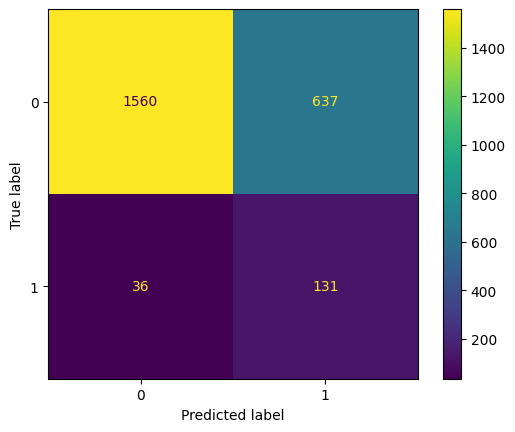

In [468]:
# y contra test

y_pred = best_model.predict(X_test[seleccion_hard_voting])    
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

El modelo es capaz de detectar casi todos los casos de la clase positiva (las potenciales morosos) pero clasifica mal una parte importante de la clase negativa (como se ve en la matriz de confusión, 637 mal clasificados como morosos, 131 clasificados correctamente, solo se le han escapado 36). Podríamos afinar un poco más, aunque tampoco está tan mal. tenemos un recall medio de 75%.

In [469]:
# optimizamos hiperparámetros

param_grid = {
    "n_estimators": [50,100,200,300],
    "max_depth": [3,4,10,12,None],
    "class_weight": ["balanced",None],   
    "min_samples_leaf" : [1,5,10],
     "min_samples_split" : [2,4,10]
}

rf_clf = RandomForestClassifier()

rf_grid = GridSearchCV(rf_clf,
                       param_grid= param_grid,
                       cv = 4,
                       scoring= "balanced_accuracy",
                       n_jobs= -1)

rf_grid.fit(X_train[seleccion_hard_voting],y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [3, 4, 10, 12, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='balanced_accuracy')

In [470]:
rf_grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [471]:
rf_grid.best_score_

np.float64(0.76313935109726)

In [473]:
# contra train 

print(classification_report(y_train, rf_grid.best_estimator_.predict(X_train[seleccion_hard_voting]))) 

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      8789
           1       0.18      0.84      0.29       663

    accuracy                           0.71      9452
   macro avg       0.58      0.77      0.55      9452
weighted avg       0.93      0.71      0.78      9452



## 13.  Evaluación contra test

              precision    recall  f1-score   support

           0       0.98      0.69      0.81      2197
           1       0.16      0.80      0.27       167

    accuracy                           0.70      2364
   macro avg       0.57      0.75      0.54      2364
weighted avg       0.92      0.70      0.77      2364



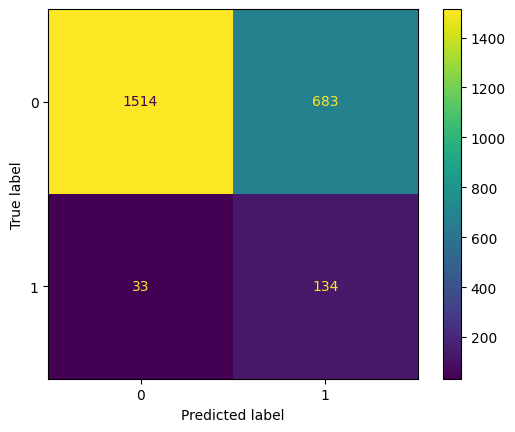

In [ ]:
# contra test

y_pred = rf_grid.best_estimator_.predict(X_test[seleccion_hard_voting])   
print(classification_report(y_test, rf_grid.best_estimator_.predict(X_test[seleccion_hard_voting]))) 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Seguimos con un recall medio de 75%, pero hemos mejorado ligeramente el recall de la clase positiva. El modelo es capaz de detectar un 80% de los morosos, lo cual no está nada mal. Es cierto que clasifica como morosos una parte importante de los que no lo son, pero lo que nos interesa es que no se nos escape ninguno en la medida de los posible. 

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.